# Setting up the notebook

In [129]:
import numpy as np
import pylab as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Plotting linear transformations on sets of points

In [95]:
R = 1.0
theta = np.linspace(0, 2*np.pi, 60, endpoint=False)
theta_sel = np.linspace(0, 2*np.pi, 4, endpoint=False)
V = np.array([(R*np.cos(i), R*np.sin(i)) for i in theta]).T
V_sel = np.array([(R*np.cos(i), R*np.sin(i)) for i in theta_sel]).T

In [74]:
theta

array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
       0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
       1.04719755, 1.15191731, 1.25663706, 1.36135682, 1.46607657,
       1.57079633, 1.67551608, 1.78023584, 1.88495559, 1.98967535,
       2.0943951 , 2.19911486, 2.30383461, 2.40855437, 2.51327412,
       2.61799388, 2.72271363, 2.82743339, 2.93215314, 3.0368729 ,
       3.14159265, 3.24631241, 3.35103216, 3.45575192, 3.56047167,
       3.66519143, 3.76991118, 3.87463094, 3.97935069, 4.08407045,
       4.1887902 , 4.29350996, 4.39822972, 4.50294947, 4.60766923,
       4.71238898, 4.81710874, 4.92182849, 5.02654825, 5.131268  ,
       5.23598776, 5.34070751, 5.44542727, 5.55014702, 5.65486678,
       5.75958653, 5.86430629, 5.96902604, 6.0737458 , 6.17846555])

In [75]:
V

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.94521895e-01,  1.04528463e-01],
       [ 9.78147601e-01,  2.07911691e-01],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 9.13545458e-01,  4.06736643e-01],
       [ 8.66025404e-01,  5.00000000e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 7.43144825e-01,  6.69130606e-01],
       [ 6.69130606e-01,  7.43144825e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 5.00000000e-01,  8.66025404e-01],
       [ 4.06736643e-01,  9.13545458e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 2.07911691e-01,  9.78147601e-01],
       [ 1.04528463e-01,  9.94521895e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-1.04528463e-01,  9.94521895e-01],
       [-2.07911691e-01,  9.78147601e-01],
       [-3.09016994e-01,  9.51056516e-01],
       [-4.06736643e-01,  9.13545458e-01],
       [-5.00000000e-01,  8.66025404e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-6.69130606e-01,  7.43144825e-01],
       [-7.

In [76]:
theta1

array([0.        , 1.57079633, 3.14159265, 4.71238898])

In [77]:
V1

array([[ 1.0000000e+00,  0.0000000e+00],
       [ 6.1232340e-17,  1.0000000e+00],
       [-1.0000000e+00,  1.2246468e-16],
       [-1.8369702e-16, -1.0000000e+00]])

In [115]:
def plot_points(ax, points, colors='blue', marker='o', size=1.0, alpha=1.0, zorder=0):
    if not isinstance(colors, list):
        colors = len(points[0]) * [colors]   
    out = ax.scatter(points[0,:], points[1,:], color=colors, marker=marker, s=size, alpha=alpha, zorder=zorder)
    return(out)

(-3, 3)

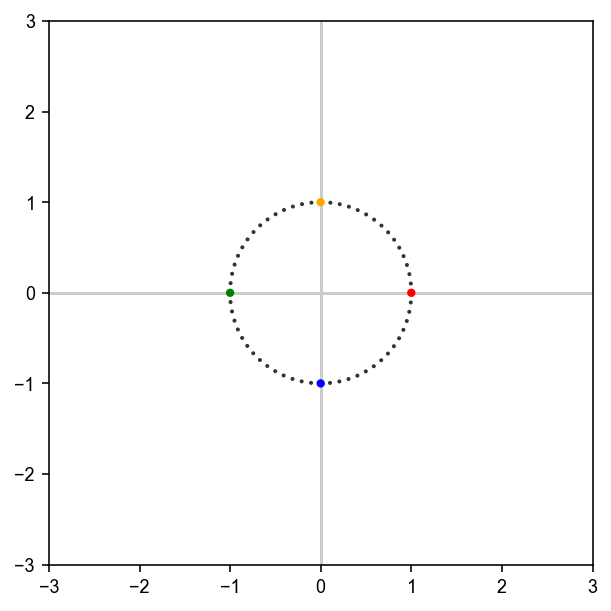

In [147]:
# Plotting the initial set of points V and V_sel

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Plotting the points
a = plot_points(ax, V, colors='.2', zorder=1)
b = plot_points(ax, V_sel, colors=['red', 'orange', 'green', 'blue'], size=10, zorder=2)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

In [163]:
# Definining the transformation
M = 1.1*np.array(
    [[0, 1],
     [-1, 0]]
    )

# Matrix multiplicaton of points V and V_sel by M
V2 = M @ V
V2_sel = M @ V_sel

(-3, 3)

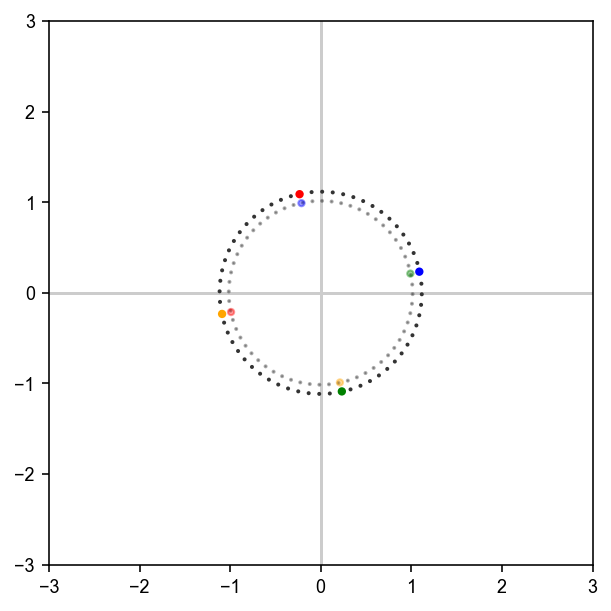

In [164]:
# Plotting the result of multiplying V and V_sel by M

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Plotting the points
plot_points(ax, V, colors='.2', zorder=1, alpha=.4)
plot_points(ax, V_sel, colors=['red', 'orange', 'green', 'blue'], size=10, zorder=2, alpha=.4)

# Plotting the newpoints
plot_points(ax, V2, colors='.2', zorder=3)
plot_points(ax, V2_sel, colors=['red', 'orange', 'green', 'blue'], size=10, zorder=4)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# Animating the flow

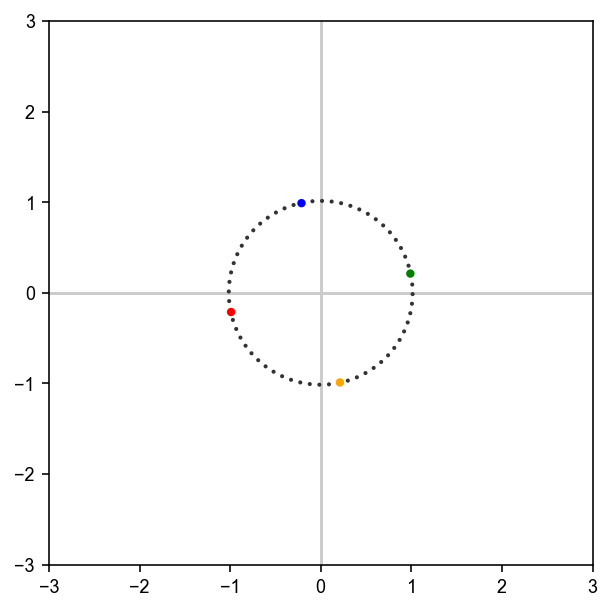

In [160]:
# Plotting the result of multiplying V and V_sel by M as an animation

FRAMES = 100
INTERVAL = 10
DT = 0.001

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

V2 = V[:]
V2_sel = V_sel[:]

# Animating 
def init():
    a = plot_points(ax, V, colors='.2', zorder=1, alpha=.2)
    b = plot_points(ax, V_sel, colors=['red', 'orange', 'green', 'blue'], size=10, zorder=2, alpha=.2)
    return a, b

def animate(i):
    ax.clear()
    # Setting the scale of x and y axis
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    ax.axhline(0, color='.8', zorder=0)
    ax.axvline(0, color='.8', zorder=0)
    
    V2 = V[:]
    V2_sel = V_sel[:]
    for j in range(i): 
        V2 += DT * M @ V2
        V2_sel += DT * M @ V2_sel
    a = plot_points(ax, V2, colors='.2', zorder=1)
    b = plot_points(ax, V2_sel, colors=['red', 'orange', 'green', 'blue'], size=10, zorder=2)
    return a, b

anim = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=INTERVAL, blit=False, init_func=init)

HTML(anim.to_html5_video())